#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


#2. Korean Characters

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [2]:
import pandas as pd

In [3]:
file = '/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap3_머신러닝/data/data_2020.csv'
data = pd.read_csv(file)

In [4]:
# distance from Seoul: 0, 20, 77, 135, 185, 240, 215, 339, 407
data["도착영업소코드"]= data["도착영업소코드"].map({105:20, 110:77, 115:135, 120:185, 125:240, 130:215, 135:339, 140:407}) 

In [5]:
data.rename(columns={"도착영업소코드":"거리"}, inplace=True)

In [6]:
data_destination = data[data["거리"]==407]

In [7]:
data_time = data_destination.groupby(["집계시", "요일", "거리"])["통행시간"].mean()

In [8]:
data_distance = data_time.unstack(level=-1)

In [9]:
data_distance.dropna()

거리               407
집계시 요일              
0   0   14383.375000
    1   14841.380952
    2   14074.116279
    3   12802.928571
    4   14461.977273
...              ...
23  2   15615.707317
    3   14802.428571
    4   16707.826923
    5   14724.673469
    6   14631.891304

[168 rows x 1 columns]

In [10]:
data_out = data_distance.reset_index()

In [11]:
stat = data_out.describe()
print(stat)

거리            집계시          요일           407
count  168.000000  168.000000    168.000000
mean    11.500000    3.000000  14494.892848
std      6.942881    2.005979   1139.476759
min      0.000000    0.000000  10867.492063
25%      5.750000    1.000000  13769.579167
50%     11.500000    3.000000  14674.567797
75%     17.250000    5.000000  15247.685861
max     23.000000    6.000000  16707.826923


In [12]:
val_25 = stat[407][4]
val_75 = stat[407][6]

In [13]:
data_out['Grade'] = 0

In [14]:
data_out

거리,집계시,요일,407,Grade
0,0,0,14383.375000,0
1,0,1,14841.380952,0
2,0,2,14074.116279,0
3,0,3,12802.928571,0
4,0,4,14461.977273,0
...,...,...,...,...
163,23,2,15615.707317,0
164,23,3,14802.428571,0
165,23,4,16707.826923,0
166,23,5,14724.673469,0


In [15]:
def get_grade(input):
  if input > val_25:
    if input > val_75:
      output = 2
    else:
      output = 1
  else:
    output = 0
  return output

In [16]:
data_grade = pd.DataFrame(columns=["time", "day", "grade"])

In [17]:
data_grade

,time,day,grade


In [18]:
for index, item in data_out.iterrows():
  print(index, item["집계시"], item["요일"])
  data_grade = data_grade.append({
      "time":item["집계시"],
      "day":item["요일"],
      "grade":get_grade(item[407])
  }, ignore_index=True)

0 0.0 0.0
1 0.0 1.0
2 0.0 2.0
3 0.0 3.0
4 0.0 4.0
5 0.0 5.0
6 0.0 6.0
7 1.0 0.0
8 1.0 1.0
9 1.0 2.0
10 1.0 3.0
11 1.0 4.0
12 1.0 5.0
13 1.0 6.0
14 2.0 0.0
15 2.0 1.0
16 2.0 2.0
17 2.0 3.0
18 2.0 4.0
19 2.0 5.0
20 2.0 6.0
21 3.0 0.0
22 3.0 1.0
23 3.0 2.0
24 3.0 3.0
25 3.0 4.0
26 3.0 5.0
27 3.0 6.0
28 4.0 0.0
29 4.0 1.0
30 4.0 2.0
31 4.0 3.0
32 4.0 4.0
33 4.0 5.0
34 4.0 6.0
35 5.0 0.0
36 5.0 1.0
37 5.0 2.0
38 5.0 3.0
39 5.0 4.0
40 5.0 5.0
41 5.0 6.0
42 6.0 0.0
43 6.0 1.0
44 6.0 2.0
45 6.0 3.0
46 6.0 4.0
47 6.0 5.0
48 6.0 6.0
49 7.0 0.0
50 7.0 1.0
51 7.0 2.0
52 7.0 3.0
53 7.0 4.0
54 7.0 5.0
55 7.0 6.0
56 8.0 0.0
57 8.0 1.0
58 8.0 2.0
59 8.0 3.0
60 8.0 4.0
61 8.0 5.0
62 8.0 6.0
63 9.0 0.0
64 9.0 1.0
65 9.0 2.0
66 9.0 3.0
67 9.0 4.0
68 9.0 5.0
69 9.0 6.0
70 10.0 0.0
71 10.0 1.0
72 10.0 2.0
73 10.0 3.0
74 10.0 4.0
75 10.0 5.0
76 10.0 6.0
77 11.0 0.0
78 11.0 1.0
79 11.0 2.0
80 11.0 3.0
81 11.0 4.0
82 11.0 5.0
83 11.0 6.0
84 12.0 0.0
85 12.0 1.0
86 12.0 2.0
87 12.0 3.0
88 12.0 4.0
89 12.0 5.0


In [19]:
data_grade

,time,day,grade
0,0.0,0.0,1.0
1,0.0,1.0,1.0
2,0.0,2.0,1.0
3,0.0,3.0,0.0
4,0.0,4.0,1.0
...,...,...,...
163,23.0,2.0,2.0
164,23.0,3.0,1.0
165,23.0,4.0,2.0
166,23.0,5.0,1.0


In [20]:
data_list = data_grade.values.tolist()

In [21]:
x_train = [r[:2] for r in data_list]
y_train = [int(r[-1]) for r in data_list]

In [22]:
import tensorflow as tf

# One hot encode [0,1,2] to [[1,0,0], [0,1,0], [0,0,1]]
y_one_hot = tf.keras.utils.to_categorical(y_train)

In [23]:
print(x_train[:3], y_train[:3], y_one_hot[:3])

[[0.0, 0.0], [0.0, 1.0], [0.0, 2.0]] [1, 1, 1] [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


#4. Multinomial Classification Using Tensorflow

In [24]:
learning_rate = 1e-2
learning_epochs = 1000

In [25]:
# SGD optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(3, input_shape=(2,), activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [27]:
import numpy as np

history = model.fit(np.array(x_train), np.array(y_one_hot), epochs=learning_epochs)

Epoch 1/1000
6/6 [==============================] - 3s 3ms/step - loss: 6.3665 - accuracy: 0.4583
Epoch 2/1000
6/6 [==============================] - 0s 2ms/step - loss: 4.2094 - accuracy: 0.4405
Epoch 3/1000
6/6 [==============================] - 0s 2ms/step - loss: 2.7232 - accuracy: 0.4286
Epoch 4/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.5258 - accuracy: 0.3810
Epoch 5/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.2256 - accuracy: 0.3393
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.1754 - accuracy: 0.3631
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.1106 - accuracy: 0.3274
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.0894 - accuracy: 0.3690
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.0562 - accuracy: 0.3155
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.0353 - accuracy: 0.3631
Epoch 11/1000
6/6 [

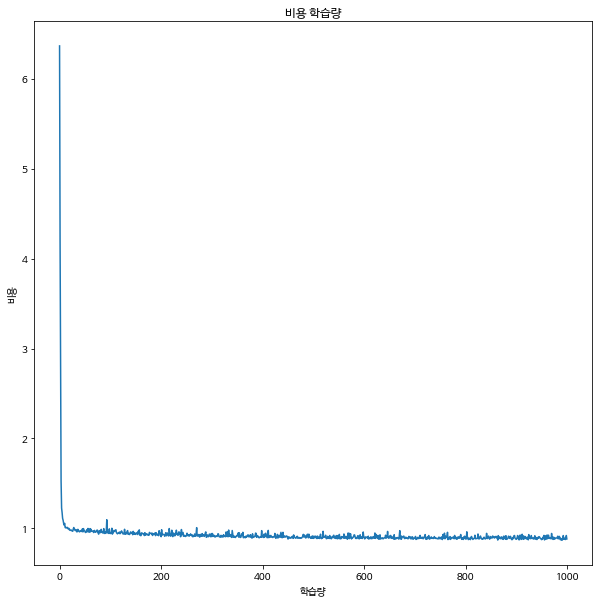

In [28]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.title("비용 학습량")
plt.ylabel("비용")
plt.xlabel("학습량")
plt.show()

In [29]:
print("%20s %20s %20s" % ("학습량", "비용", "정확도") + "\n")
for step in range(learning_epochs):
  if step%100 == 0:
    cost_val = history.history['loss'][step]
    acc_val = history.history['accuracy'][step]
    print("%20i %20.5f %20.5f" %(step, cost_val, acc_val))

                 학습량                   비용                  정확도

                   0              6.36647              0.45833
                 100              0.94946              0.36905
                 200              0.90696              0.44643
                 300              0.90839              0.43452
                 400              0.90962              0.46429
                 500              0.88789              0.43452
                 600              0.89619              0.47024
                 700              0.89647              0.45833
                 800              0.90052              0.46429
                 900              0.88717              0.45833


In [30]:
time = 14 #@param {type:"slider", min:0, max:23, step:1}
day = 3 #@param {type:"slider", min:0, max:6, step:1}

In [31]:
time_condition = data_out["집계시"]==time
day_condition = data_out["요일"]==day
data_out[time_condition & day_condition]

거리,집계시,요일,407,Grade
101,14,3,14671.333333,0


In [33]:
input = [time, day]
result = model.predict(np.array([input]))

grade_list = ["빠름", "보통", "느림"]
grade_index = np.argmax(result[0])
grade = grade_list[grade_index]

print("%30s" % ("속도등급") + "\n")
print("%30s" % (grade) + "\n")
print(result[0], grade_index)

                          속도등급

                            보통

[0.15541112 0.55699944 0.28758946] 1
